**Car Price Prediction Using Supervised Machine Learning**


---


> Utilizing supervised machine learning techniques, particularly regression models, we analyze historical pricing data to identify key factors influencing car valuation. The model is trained and evaluated using different regression algorithms, including **Linear Regression**, **Decision Tree Regression**, and **Random Forest Regression**, to determine the most effective approach for price prediction.





In [44]:
# Calling librarries

import pandas as pd
import numpy as np
import klib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.feature_selection import mutual_info_regression


# Data processing

In [2]:
df=pd.read_csv("/content/Supervised-ML-Projects/Car_Price_Regression_Supervised_ML/Car price.csv")

In [3]:
df.head(3)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,04-May,Right-hand drive,Black,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                19237 non-null  int64 
 1   Price             19237 non-null  int64 
 2   Levy              19237 non-null  object
 3   Manufacturer      19237 non-null  object
 4   Model             19237 non-null  object
 5   Prod. year        19237 non-null  int64 
 6   Category          19237 non-null  object
 7   Leather interior  19237 non-null  object
 8   Fuel type         19237 non-null  object
 9   Engine volume     19237 non-null  object
 10  Mileage           19237 non-null  object
 11  Cylinders         19237 non-null  int64 
 12  Gear box type     19237 non-null  object
 13  Drive wheels      19237 non-null  object
 14  Doors             19237 non-null  object
 15  Wheel             19237 non-null  object
 16  Color             19237 non-null  object
 17  Airbags     

In [5]:
# Data cleaning with klib (remove duplicated rows and increasing memory usage of datset)

df=klib.data_cleaning(df)

Shape of cleaned data: (18924, 18) - Remaining NAs: 0


Dropped rows: 313
     of which 313 duplicates. (Rows (first 150 shown): [425, 1581, 1697, 1972, 2131, 2268, 2373, 2437, 2450, 2923, 2968, 3026, 3383, 3433, 3525, 3598, 3604, 3859, 3919, 4035, 4182, 4278, 4298, 4398, 4403, 4509, 4732, 4752, 4756, 4862, 4984, 5121, 5174, 5194, 5246, 5328, 5331, 5350, 5354, 5455, 5477, 5572, 5653, 5716, 5778, 5919, 5942, 5989, 6030, 6037, 6071, 6101, 6120, 6138, 6189, 6249, 6291, 6732, 6776, 6847, 6849, 6871, 7035, 7112, 7138, 7269, 7274, 7347, 7406, 7411, 7444, 7796, 7814, 7838, 7848, 7850, 7932, 7944, 7949, 7986, 8177, 8240, 8281, 8437, 8495, 8590, 8657, 8717, 8730, 8765, 9059, 9081, 9120, 9196, 9274, 9275, 9301, 9399, 9779, 9799, 9816, 9824, 9847, 9921, 9965, 9987, 10078, 10081, 10143, 10152, 10264, 10309, 10338, 10339, 10442, 10457, 10513, 10536, 10542, 10604, 10825, 10915, 10925, 10973, 10976, 11020, 11029, 11162, 11209, 11499, 11525, 11528, 11578, 11698, 11729, 11988, 12021, 12025, 12053, 1207

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18924 entries, 0 to 18923
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id                18924 non-null  int32   
 1   price             18924 non-null  int32   
 2   levy              18924 non-null  category
 3   manufacturer      18924 non-null  category
 4   model             18924 non-null  string  
 5   prod_year         18924 non-null  int16   
 6   category          18924 non-null  category
 7   leather_interior  18924 non-null  category
 8   fuel_type         18924 non-null  category
 9   engine_volume     18924 non-null  category
 10  mileage           18924 non-null  string  
 11  cylinders         18924 non-null  int8    
 12  gear_box_type     18924 non-null  category
 13  drive_wheels      18924 non-null  category
 14  doors             18924 non-null  category
 15  wheel             18924 non-null  category
 16  color             1892

In [7]:
# Finding missing values

df.isnull().sum()

,0
id,0
price,0
levy,0
manufacturer,0
model,0
prod_year,0
category,0
leather_interior,0
fuel_type,0
engine_volume,0


In [8]:
# selecting categorical columns and numerical columns

categorical_col=df.select_dtypes(include=["string","category"]).columns.tolist()
print(f"CATEGORICAL COLUMNS: \n{', '.join(categorical_col)}")
print(f"\nTOTAL NUMBER OF CATEGORICAL COLUMNS: {len(categorical_col)}") # object tipli ustunlarni umumiy soni

numerical_col=df.select_dtypes(include=["int8","int16","int32"]).columns.tolist()
print(f"\nNUMERICAL COLUMNS: {', '.join(numerical_col)}")
print(f"\nTOTAL NUMBER OF NUMERICAL COLUMNS:{len(numerical_col)}") # int va float tipidagi ustunlarni umumiy soni

CATEGORICAL COLUMNS: 
levy, manufacturer, model, category, leather_interior, fuel_type, engine_volume, mileage, gear_box_type, drive_wheels, doors, wheel, color

TOTAL NUMBER OF CATEGORICAL COLUMNS: 13

NUMERICAL COLUMNS: id, price, prod_year, cylinders, airbags

TOTAL NUMBER OF NUMERICAL COLUMNS:5


In [9]:
df.head()

,id,price,levy,manufacturer,model,prod_year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,04-May,Left wheel,Silver,4


The columns **'levy', 'engine_volume', 'mileage', and 'doors'** have issues because, although they should be numerical, they are not properly formatted as numerical values.

In [10]:
df['doors'].value_counts()

,count
doors,
04-May,18032
02-Mar,768
>5,124


I choose to drop the **"doors"** column because it contains incorrect data.

In [11]:
df = df.drop(columns='doors')

In [12]:
df["levy"].value_counts()

,count
levy,
-,5709
765,481
891,453
639,403
640,398
...,...
3015,1
3025,1
3057,1


In [13]:
# Cleaning and handling "levy" column

df['levy'] = pd.to_numeric(df['levy'], errors='coerce')

df.isnull().sum()

,0
id,0
price,0
levy,5710
manufacturer,0
model,0
prod_year,0
category,0
leather_interior,0
fuel_type,0
engine_volume,0


I choose to drop null values since there are 5,710 missing entries. Filling them using methods like `mean()` or `median()` could result in an unstable dataset.

In [14]:

df.dropna(subset=['levy'], inplace=True)  # Drops rows where 'Price' is NaN


In [15]:
df["mileage"]

,mileage
0,186005 km
1,192000 km
3,168966 km
4,91901 km
5,160931 km
...,...
18918,107800 km
18920,161600 km
18921,116365 km
18922,51258 km


In [16]:
# cleaning "mileage" column from extra "km" word

df['mileage']=df['mileage'].str.replace('km', '', regex=False)
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')

In [17]:
df["mileage"]

,mileage
0,186005
1,192000
3,168966
4,91901
5,160931
...,...
18918,107800
18920,161600
18921,116365
18922,51258


In the **"engine_volume"** column, some data contains strings like **"2.0 Turbo,"** which is why it is categorized as a categorical variable. Instead of simply removing **"Turbo"** from the data to convert it into numerical values, I created a new column **"is_turbo"** to indicate whether the engine is turbocharged or not. This approach is more accurate and logical.

In [18]:
df["engine_volume"]

,engine_volume
0,3.5
1,3
3,2.5
4,1.3
5,2
...,...
18918,3.5
18920,2.4
18921,2
18922,2


In [19]:
# Create a new 'turbo' column (1 if 'Turbo' is present, else 0)
df['is_turbo'] = df['engine_volume'].apply(lambda x: 1 if 'Turbo' in x else 0)

# Remove 'Turbo' and convert the 'engine' column to numeric
df['engine_volume'] = df['engine_volume'].str.replace(' Turbo', '', regex=False).astype(float)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13214 entries, 0 to 18923
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id                13214 non-null  int32   
 1   price             13214 non-null  int32   
 2   levy              13214 non-null  float64 
 3   manufacturer      13214 non-null  category
 4   model             13214 non-null  string  
 5   prod_year         13214 non-null  int16   
 6   category          13214 non-null  category
 7   leather_interior  13214 non-null  category
 8   fuel_type         13214 non-null  category
 9   engine_volume     13214 non-null  float64 
 10  mileage           13214 non-null  Int64   
 11  cylinders         13214 non-null  int8    
 12  gear_box_type     13214 non-null  category
 13  drive_wheels      13214 non-null  category
 14  wheel             13214 non-null  category
 15  color             13214 non-null  category
 16  airbags           13214 non

In [21]:
df['model'] = df['model'].astype('category')

df = df.drop(columns='id')

In [22]:
df = klib.data_cleaning(df)

Shape of cleaned data: (10040, 17) - Remaining NAs: 0


Dropped rows: 3174
     of which 3174 duplicates. (Rows (first 150 shown): [192, 239, 264, 331, 347, 491, 497, 529, 530, 531, 540, 546, 654, 695, 733, 760, 779, 796, 800, 814, 815, 849, 879, 910, 913, 929, 986, 993, 1004, 1005, 1006, 1012, 1084, 1122, 1136, 1174, 1232, 1236, 1274, 1307, 1312, 1323, 1334, 1337, 1342, 1361, 1363, 1372, 1385, 1392, 1395, 1397, 1406, 1413, 1439, 1464, 1498, 1506, 1508, 1511, 1512, 1519, 1547, 1561, 1562, 1605, 1623, 1636, 1644, 1648, 1651, 1653, 1660, 1700, 1733, 1742, 1747, 1750, 1764, 1780, 1797, 1820, 1832, 1856, 1865, 1868, 1873, 1891, 1896, 1909, 1917, 1938, 1940, 1945, 1952, 1959, 1962, 1986, 1988, 1990, 1996, 1998, 2008, 2028, 2061, 2069, 2075, 2084, 2086, 2091, 2097, 2107, 2113, 2121, 2136, 2139, 2144, 2145, 2155, 2184, 2191, 2236, 2240, 2242, 2247, 2252, 2261, 2262, 2271, 2276, 2282, 2295, 2301, 2320, 2330, 2353, 2355, 2356, 2367, 2373, 2392, 2396, 2405, 2407, 2429, 2440, 2441, 2452, 2458, 24

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10040 entries, 0 to 10039
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             10040 non-null  int32   
 1   levy              10040 non-null  float32 
 2   manufacturer      10040 non-null  category
 3   model             10040 non-null  category
 4   prod_year         10040 non-null  int16   
 5   category          10040 non-null  category
 6   leather_interior  10040 non-null  category
 7   fuel_type         10040 non-null  category
 8   engine_volume     10040 non-null  float32 
 9   mileage           10040 non-null  Int32   
 10  cylinders         10040 non-null  int8    
 11  gear_box_type     10040 non-null  category
 12  drive_wheels      10040 non-null  category
 13  wheel             10040 non-null  category
 14  color             10040 non-null  category
 15  airbags           10040 non-null  int8    
 16  is_turbo          1004

# Visualization

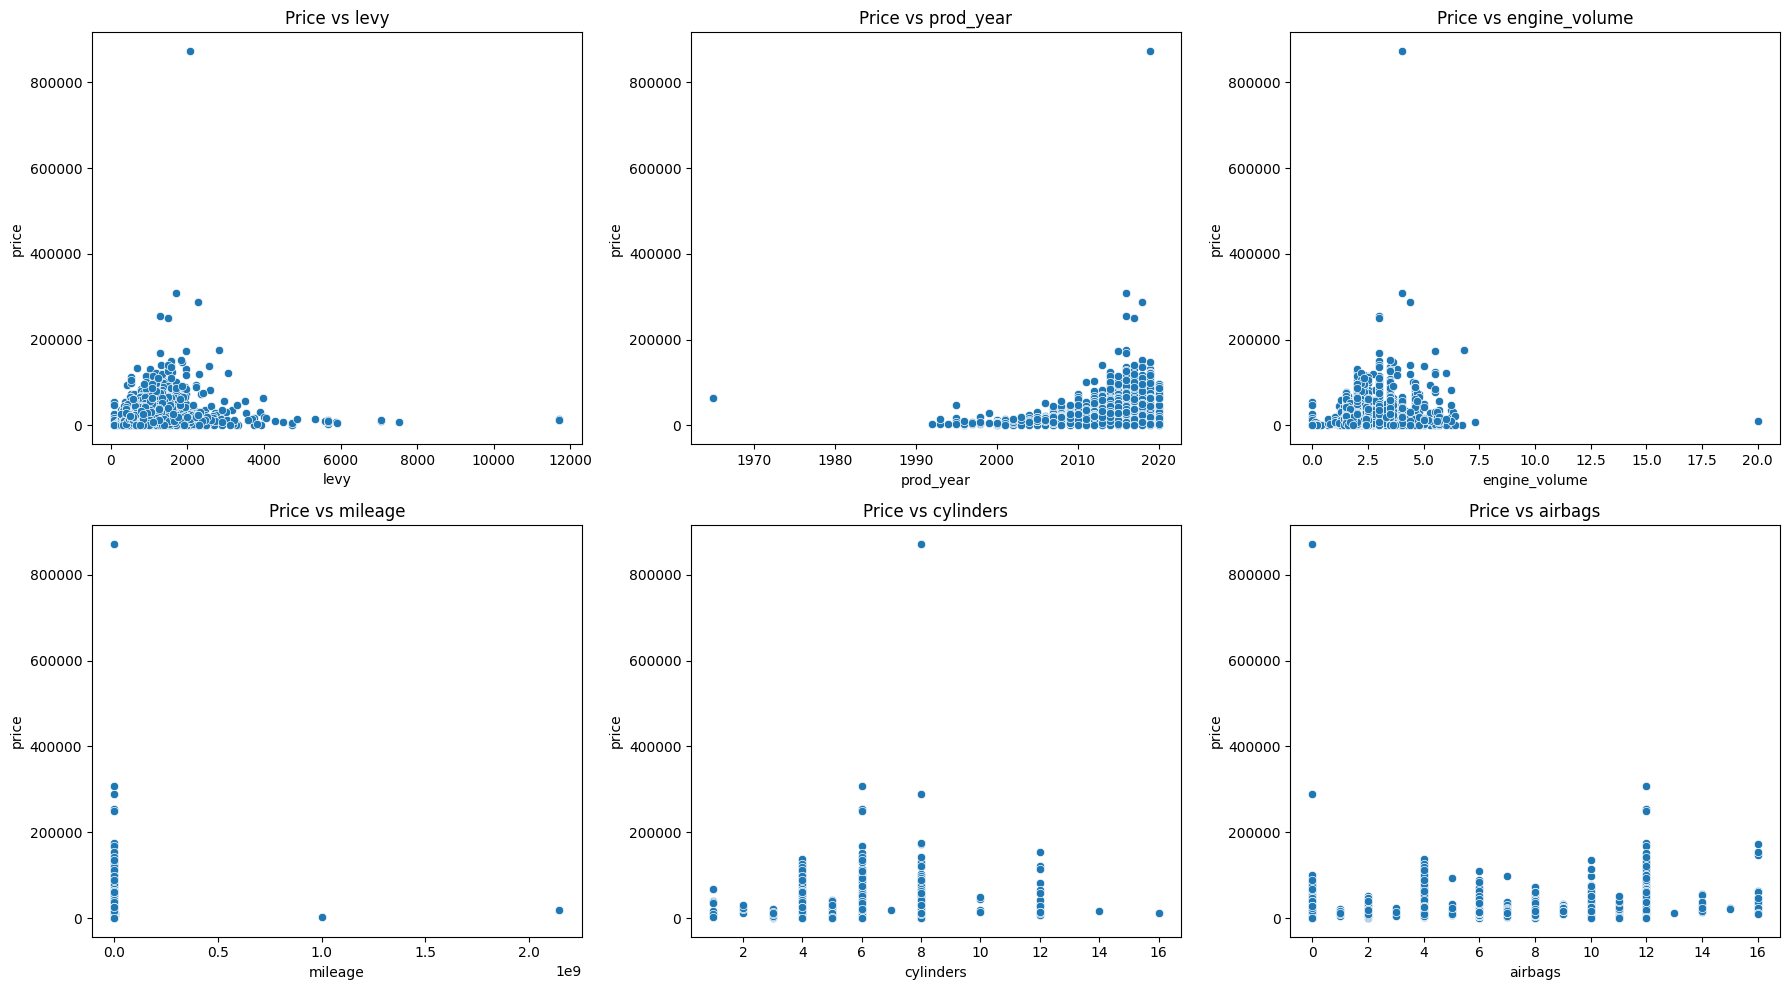

In [24]:
numerical_features = ['levy', 'prod_year', 'engine_volume', 'mileage', 'cylinders', 'airbags']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, feature in enumerate(numerical_features):
    row, col = i // 3, i % 3
    sns.scatterplot(x=df[feature], y=df["price"], ax=axes[row, col])
    axes[row, col].set_title(f"Price vs {feature}")

plt.tight_layout()
plt.show()


In [25]:
from scipy import stats


categorical_features=df.select_dtypes(include=["category"]).columns.tolist()

# Perform ANOVA test for each categorical feature
for feature in categorical_features:
    groups = [df['price'][df[feature] == category] for category in df[feature].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    print(f"ANOVA Test for {feature}: p-value = {p_value}")


ANOVA Test for manufacturer: p-value = 0.0
ANOVA Test for model: p-value = 0.0
ANOVA Test for category: p-value = 4.646340348893078e-182
ANOVA Test for leather_interior: p-value = 1.3152630951920031e-14
ANOVA Test for fuel_type: p-value = 1.5816339899647806e-130
ANOVA Test for gear_box_type: p-value = 1.0167687569844418e-55
ANOVA Test for drive_wheels: p-value = 0.00010863064926371139
ANOVA Test for wheel: p-value = 1.593609444481445e-15
ANOVA Test for color: p-value = 1.977408466262521e-23


In [26]:
# Correlation between numerical features and target
numerical_features = ['levy', 'prod_year', 'engine_volume', 'mileage', 'cylinders', 'airbags']  # Add numerical columns here
correlation_matrix = df[numerical_features + ['price']].corr()

# Display the correlation between the input and target (price)
print(correlation_matrix['price'])


levy             0.081064
prod_year        0.300195
engine_volume    0.106172
mileage         -0.004808
cylinders        0.067999
airbags         -0.164225
price            1.000000
Name: price, dtype: float64


# Encoding

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10040 entries, 0 to 10039
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             10040 non-null  int32   
 1   levy              10040 non-null  float32 
 2   manufacturer      10040 non-null  category
 3   model             10040 non-null  category
 4   prod_year         10040 non-null  int16   
 5   category          10040 non-null  category
 6   leather_interior  10040 non-null  category
 7   fuel_type         10040 non-null  category
 8   engine_volume     10040 non-null  float32 
 9   mileage           10040 non-null  Int32   
 10  cylinders         10040 non-null  int8    
 11  gear_box_type     10040 non-null  category
 12  drive_wheels      10040 non-null  category
 13  wheel             10040 non-null  category
 14  color             10040 non-null  category
 15  airbags           10040 non-null  int8    
 16  is_turbo          1004

In [28]:
# Categorical columns

categorical_col=df.select_dtypes(include=["category"]).columns.tolist()

print(f"CATEGORICAL COLUMNS:\n{categorical_col}")
print(f"\nTOTAL NUMBER OF CATEGORICAL COLUMNS: {len(categorical_col)}")

CATEGORICAL COLUMNS:
['manufacturer', 'model', 'category', 'leather_interior', 'fuel_type', 'gear_box_type', 'drive_wheels', 'wheel', 'color']

TOTAL NUMBER OF CATEGORICAL COLUMNS: 9


In [29]:
# Finding cardinality

cardinality=df[categorical_col].nunique()
print(cardinality)

manufacturer         49
model               793
category             10
leather_interior      2
fuel_type             7
gear_box_type         4
drive_wheels          3
wheel                 2
color                16
dtype: int64


In [30]:
# Label encoding

label_encoder=LabelEncoder()
encoding_columns=["manufacturer", "model", "category", "color", "fuel_type"] # Cardinalitysi yuqori bo'lgan columnlarni belgilab olib ularni label encoding qildim
for col in encoding_columns:
    df[col]=label_encoder.fit_transform(df[col])


In [31]:
df["manufacturer"]

,manufacturer
0,26
1,6
2,14
3,17
4,19
...,...
10035,35
10036,45
10037,19
10038,19


In [32]:
# Categorical columns
# 9 tadan 4 taga kamaydi
categorical_col=df.select_dtypes(include=["category"]).columns.tolist()

print(f"CATEGORICAL COLUMNS:\n{categorical_col}")
print(f"\nTOTAL NUMBER OF CATEGORICAL COLUMNS: {len(categorical_col)}")

CATEGORICAL COLUMNS:
['leather_interior', 'gear_box_type', 'drive_wheels', 'wheel']

TOTAL NUMBER OF CATEGORICAL COLUMNS: 4


In [33]:
# Separate the categorical columns and numerical columns (float columns)
df_categorical = df[categorical_col]
df_numerical = df.drop(columns=categorical_col)

# One-Hot Encode the categorical columns
df_encoded = pd.get_dummies(df_categorical, drop_first=True)
df_encoded= df_encoded.astype(int)

# Concatenate the encoded categorical columns with the numerical ones (float columns)
df_final = pd.concat([df_numerical, df_encoded], axis=1)





In [34]:
df_final.head()

,price,levy,manufacturer,model,prod_year,category,fuel_type,engine_volume,mileage,cylinders,color,airbags,is_turbo,leather_interior_Yes,gear_box_type_Manual,gear_box_type_Tiptronic,gear_box_type_Variator,drive_wheels_Front,drive_wheels_Rear,wheel_Right-hand drive
0,13328,1399.0,26,629,2010,4,3,3.5,186005,6,12,12,0,1,0,0,0,0,0,0
1,16621,1018.0,6,313,2011,4,5,3.0,192000,6,1,8,0,0,0,1,0,0,0,0
2,3607,862.0,14,316,2011,4,3,2.5,168966,4,14,0,0,1,0,0,0,0,0,0
3,11726,446.0,17,331,2014,3,5,1.3,91901,4,12,4,0,1,0,0,0,1,0,0
4,39493,891.0,19,652,2016,4,2,2.0,160931,4,14,4,0,1,0,0,0,1,0,0


In [35]:
df_final = klib.data_cleaning(df_final)

Shape of cleaned data: (10040, 20) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.79 MB (-69.91%)



In [36]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10040 entries, 0 to 10039
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    10040 non-null  int32  
 1   levy                     10040 non-null  float32
 2   manufacturer             10040 non-null  int8   
 3   model                    10040 non-null  int16  
 4   prod_year                10040 non-null  int16  
 5   category                 10040 non-null  int8   
 6   fuel_type                10040 non-null  int8   
 7   engine_volume            10040 non-null  float32
 8   mileage                  10040 non-null  Int32  
 9   cylinders                10040 non-null  int8   
 10  color                    10040 non-null  int8   
 11  airbags                  10040 non-null  int8   
 12  is_turbo                 10040 non-null  int8   
 13  leather_interior_yes     10040 non-null  int8   
 14  gear_box_type_manual  

# Scaling

In [37]:
df_final.head()

,price,levy,manufacturer,model,prod_year,category,fuel_type,engine_volume,mileage,cylinders,color,airbags,is_turbo,leather_interior_yes,gear_box_type_manual,gear_box_type_tiptronic,gear_box_type_variator,drive_wheels_front,drive_wheels_rear,wheel_right_hand_drive
0,13328,1399.0,26,629,2010,4,3,3.5,186005,6,12,12,0,1,0,0,0,0,0,0
1,16621,1018.0,6,313,2011,4,5,3.0,192000,6,1,8,0,0,0,1,0,0,0,0
2,3607,862.0,14,316,2011,4,3,2.5,168966,4,14,0,0,1,0,0,0,0,0,0
3,11726,446.0,17,331,2014,3,5,1.3,91901,4,12,4,0,1,0,0,0,1,0,0
4,39493,891.0,19,652,2016,4,2,2.0,160931,4,14,4,0,1,0,0,0,1,0,0


In [39]:
# scaling with StandardScaler

scaler = StandardScaler()

numerical = ['price', 'levy', 'manufacturer', 'model', 'prod_year', 'engine_volume', 'mileage',]

df_numerical = df[numerical]
df_encoded = df_final.drop(columns=df_numerical)

df_numerical_scaled = scaler.fit_transform(df_numerical)
df_numerical_scaled = pd.DataFrame(df_numerical_scaled, columns=df_numerical.columns)

df_final_scaled = pd.concat([df_numerical_scaled, df_encoded], axis=1)

df=df_final_scaled

In [40]:
df.head()

,price,levy,manufacturer,model,prod_year,engine_volume,mileage,category,fuel_type,cylinders,color,airbags,is_turbo,leather_interior_yes,gear_box_type_manual,gear_box_type_tiptronic,gear_box_type_variator,drive_wheels_front,drive_wheels_rear,wheel_right_hand_drive
0,-0.307434,1.132477,0.081017,0.942858,-1.011957,1.765694,-0.010740,4,3,6,12,12,0,1,0,0,0,0,0,0
1,-0.144555,0.301999,-1.373446,-0.527846,-0.695720,1.101695,-0.010487,4,5,6,1,8,0,0,0,1,0,0,0,0
2,-0.788253,-0.038040,-0.791661,-0.513883,-0.695720,0.437697,-0.011461,4,3,4,14,0,0,1,0,0,0,0,0,0
3,-0.386672,-0.944809,-0.573491,-0.444071,0.252989,-1.155900,-0.014721,3,5,4,12,4,0,1,0,0,0,1,0,0
4,0.986739,0.025172,-0.428045,1.049903,0.885462,-0.226302,-0.011801,4,2,4,14,4,0,1,0,0,0,1,0,0


In [41]:
X = df.drop(columns='price')
y = df['price']

In [45]:

#Mutual Score
mi_scores = mutual_info_regression(X, y)

mi_scores_df = pd.DataFrame(mi_scores, index=X.columns, columns=['MI Score'])
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)

print(mi_scores_df)

                         MI Score
model                    0.492264
levy                     0.444948
airbags                  0.423667
manufacturer             0.294813
engine_volume            0.285373
prod_year                0.229495
fuel_type                0.208259
category                 0.176979
mileage                  0.174241
leather_interior_yes     0.126964
gear_box_type_tiptronic  0.109403
drive_wheels_front       0.088624
color                    0.076291
cylinders                0.065502
is_turbo                 0.048265
wheel_right_hand_drive   0.044652
gear_box_type_variator   0.022381
gear_box_type_manual     0.015791
drive_wheels_rear        0.006087


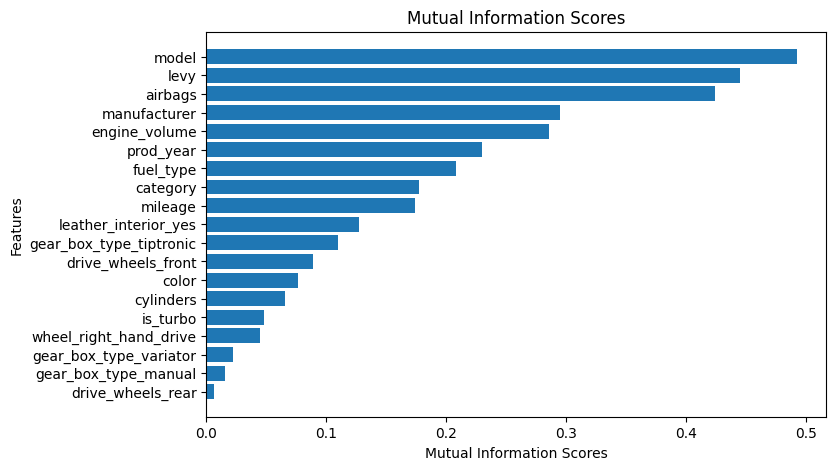

In [46]:
def plot_mi_scores(scores):
  scores = scores.sort_values(ascending=True)
  width = np.arange(len(scores))
  ticks = list(scores.index)

  plt.barh(width, scores)
  plt.yticks(width, ticks)
  plt.title("Mutual Information Scores")
  plt.xlabel("Mutual Information Scores")
  plt.ylabel("Features")
  plt.show()


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores_df["MI Score"])

In [ ]:
# X is input (features)
# y is output(target feature)